# Imports and aux functions

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

In [61]:
def round_to_nearest(number, lower_limit, upper_limit):
    diff_lower = abs(number - lower_limit)
    diff_upper = abs(number - upper_limit)
    
    if diff_lower < diff_upper:
        return lower_limit
    else:
        return upper_limit

# ANN to predict thickness of target

In [125]:
with open('data.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]

Blue graph: Thick:600.2902564706321 Angle: 165.0
Orange graph: Thick:604.8508309141174 Angle: 140.0


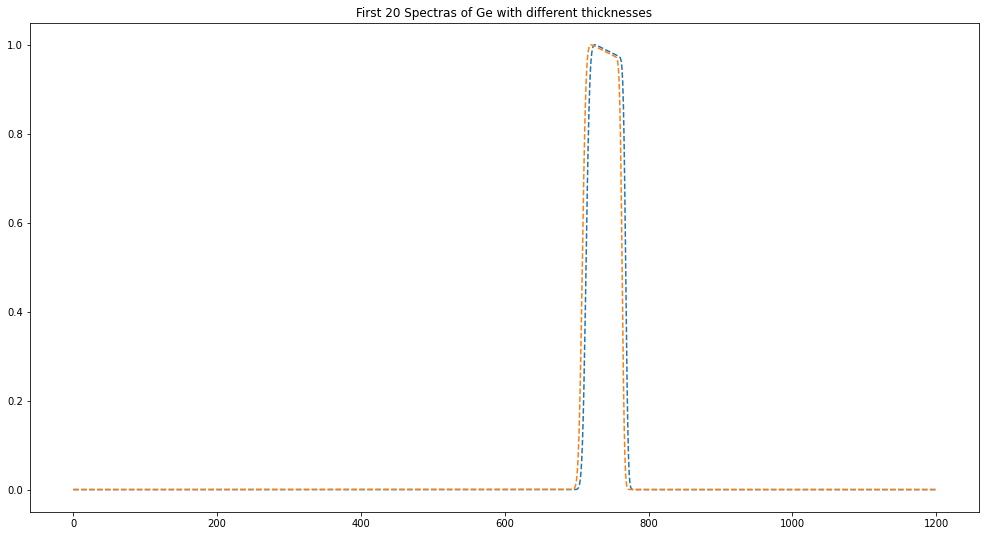

In [128]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[0],'--')
print('Blue graph: Thick:'+str(Y[0][0])+' Angle: '+str(Y[0][1]))
plt.plot(xaxis,X[2],'--')
print('Orange graph: Thick:'+str(Y[3][0])+' Angle: '+str(Y[3][1]))
plt.title('First 20 Spectras of Ge with different thicknesses')
plt.show()

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=10,random_state=np.random.randint(0,50))

In [130]:
model=keras.models.Sequential(
    [keras.layers.Dense(150,activation='relu',input_shape=(1200,)),
     keras.layers.Dense(75,activation='relu'),
     keras.layers.Dense(25,activation='relu'),
     keras.layers.Dense(2,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32

In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 150)               180150    
                                                                 
 dense_51 (Dense)            (None, 75)                11325     
                                                                 
 dense_52 (Dense)            (None, 25)                1900      
                                                                 
 dense_53 (Dense)            (None, 2)                 52        
                                                                 
Total params: 193427 (755.57 KB)
Trainable params: 193427 (755.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)

In [ ]:
#loss, mae = model.evaluate(X_test, y_test)
#print("Mean Absolute Error:", mae)

In [ ]:
predictions=model.predict(X_test)
for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 140, 165)

for i in range(len(predictions)):
    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print('Angle: ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print()
    print()